In [15]:
import yaml
import matplotlib.pyplot as plt
import math
from functions import merge, leakage_coefficient, correlation_factor
from functions import plot_coefficient, avarage_mean, purity#, analyze_coefficient

In [17]:
directory = 'dati/txt files 17'
with open(directory + '/Wgamma.txt', 'r') as f:
    Wgamma = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/Zgamma.txt', 'r') as f:
    Zgamma = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/Znunugamma.txt', 'r') as f:
    Znunugamma = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/gammajets.txt', 'r') as f:
    gammajets = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/Wjets.txt', 'r') as f:
    Wjets = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/Zjets.txt', 'r') as f:
    Zjets = yaml.load(f, Loader=yaml.SafeLoader)
with open(directory + '/data.txt', 'r') as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)
    
signal = {'Wgamma': Wgamma,
          'Zgamma': Zgamma,
          'Znunugamma': Znunugamma,
          'gammajets': gammajets}

background = {'Wjets': Wjets,
              'Zjets': Zjets}

CR = ['SR', 'onemuCR', 'twomuCR', 'twoeCR']
CR_label = ['SR', '1muCR', '2muCR', '2eCR']
met_regions = ['ISR1', 'ISR2', 'ISR3', 'ESR1', 'ESR2']


tight_selections = ['tight','tight3', 'tight4', 'tight5', 'nottight']
not_tight_selections = ['tight3', 'tight4', 'tight5']
isolation_variations = ['up', 'iso', 'down']

In [45]:
def analyZnunue_coefficient(coeff):
    
    if 'Znunugamma' in coeff and 'Znunugamma' in coeff and 'Znunununugamma' in coeff and 'gammajets' in coeff:

        SR          = {'mean' : [coeff['Znunugamma']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunugamma']['sigma'][i] for i in range(5)]}
        onemuCR     = {'mean' : [coeff['Znunugamma']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunugamma']['sigma'][i] for i in range(5)]}
        tZnunuomuCR     = {'mean' : [coeff['Znunugamma']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunugamma']['sigma'][i] for i in range(5)]}
        tZnunuoeCR      = {'mean' : [coeff['Znunugamma']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunugamma']['sigma'][i] for i in range(5)]}
        gammajetCR  = {'mean' : [coeff['gammajets']['mean'][5]], \
                       'sigma': [coeff['gammajets']['sigma'][5]]}
    

    if 'Znunujets' in coeff and 'Znunujets' in coeff:

        # temp = []
        # for key in coeff:
        #     temp.append(coeff[key])
        
        avarage_array = avarage_mean([coeff[key] for key in coeff])

        SR          = {'mean' : [coeff['Znunujets']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunujets']['sigma'][i] for i in range(5)]}
        onemuCR     = {'mean' : [coeff['Znunujets']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunujets']['sigma'][i] for i in range(5)]}
        tZnunuomuCR     = {'mean' : [coeff['Znunujets']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunujets']['sigma'][i] for i in range(5)]}
        tZnunuoeCR      = {'mean' : [coeff['Znunujets']['mean'][i]  for i in range(5)], \
                       'sigma': [coeff['Znunujets']['sigma'][i] for i in range(5)]}
        gammajetCR  = {'mean' : [avarage_array['mean'][5]], \
                       'sigma': [avarage_array['sigma'][5]]}


    return {'mean' : SR['mean'] + onemuCR['mean'] + tZnunuomuCR['mean'] + tZnunuoeCR['mean'] + gammajetCR['mean'], \
            'sigma': SR['sigma'] + onemuCR['sigma'] + tZnunuomuCR['sigma'] + tZnunuoeCR['sigma'] + gammajetCR['sigma']}


    # temp = []
    # for key in coeff:
    #     temp.append(coeff[key])
    
    # avarage_array = avarage_mean(temp)
    
    # gammajet = {'mean': avarage_array['mean'][5], 'sigma': avarage_array['sigma'][5]}
    
    # del avarage_array['mean'][5]
    # del avarage_array['sigma'][5]
    
    # return {'mean': avarage_array['mean'] + avarage_array['mean'] + avarage_array['mean'] + avarage_array['mean'] + [gammajet['mean']],
    #         'sigma': avarage_array['sigma'] + avarage_array['sigma'] + avarage_array['sigma'] + avarage_array['mean'] + [gammajet['sigma']]}

    





Ma 12


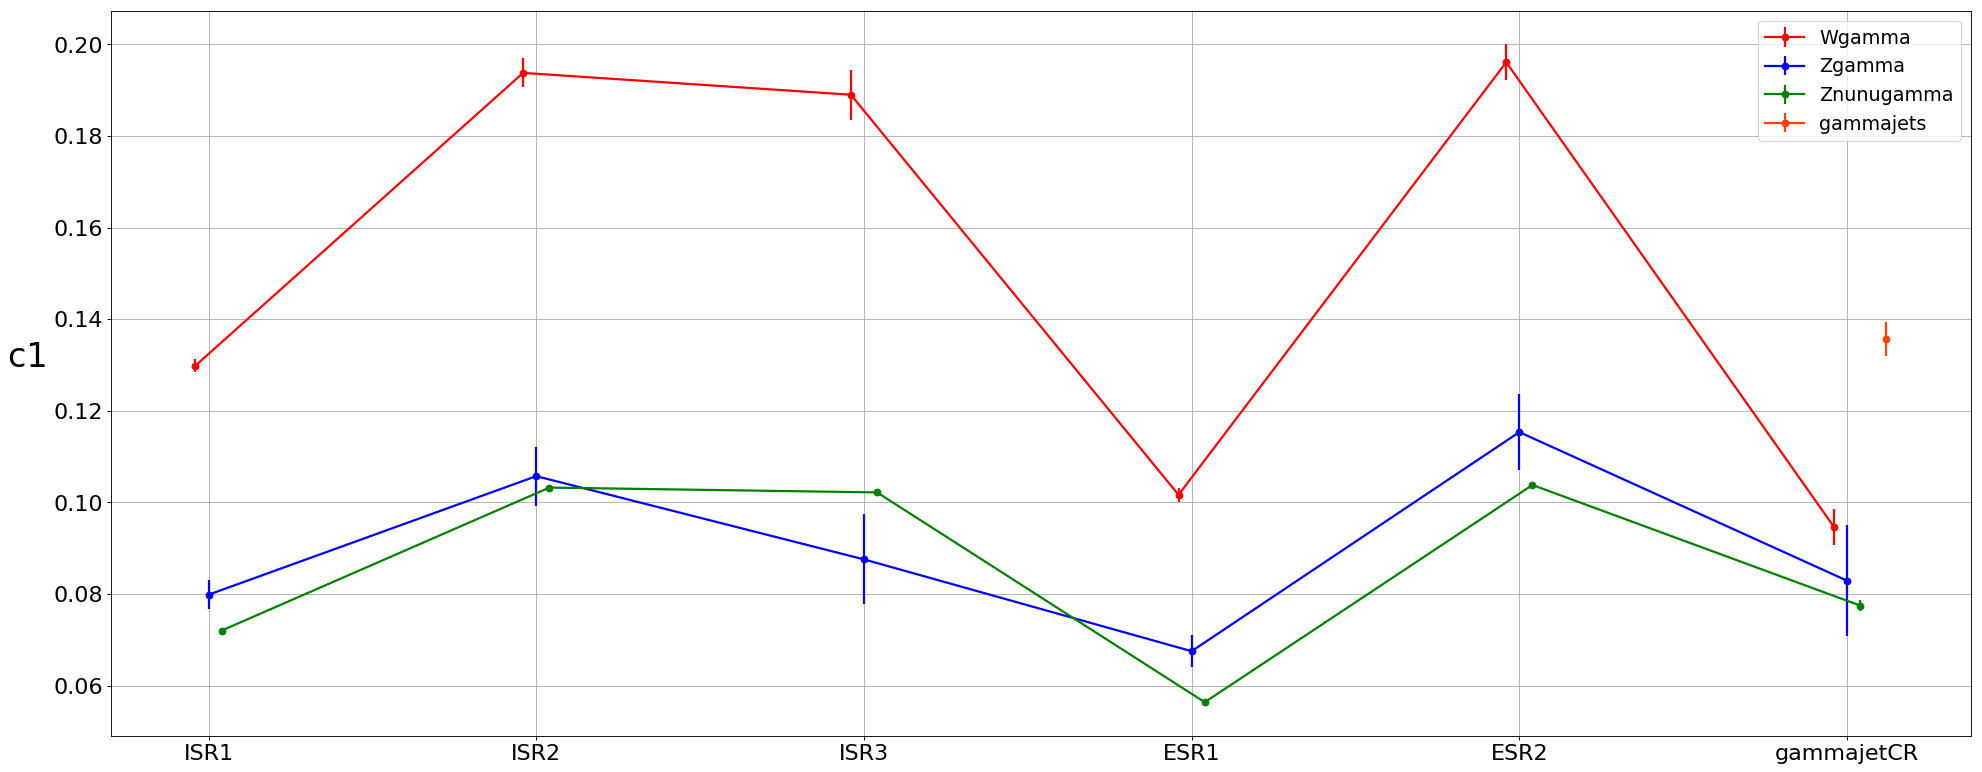

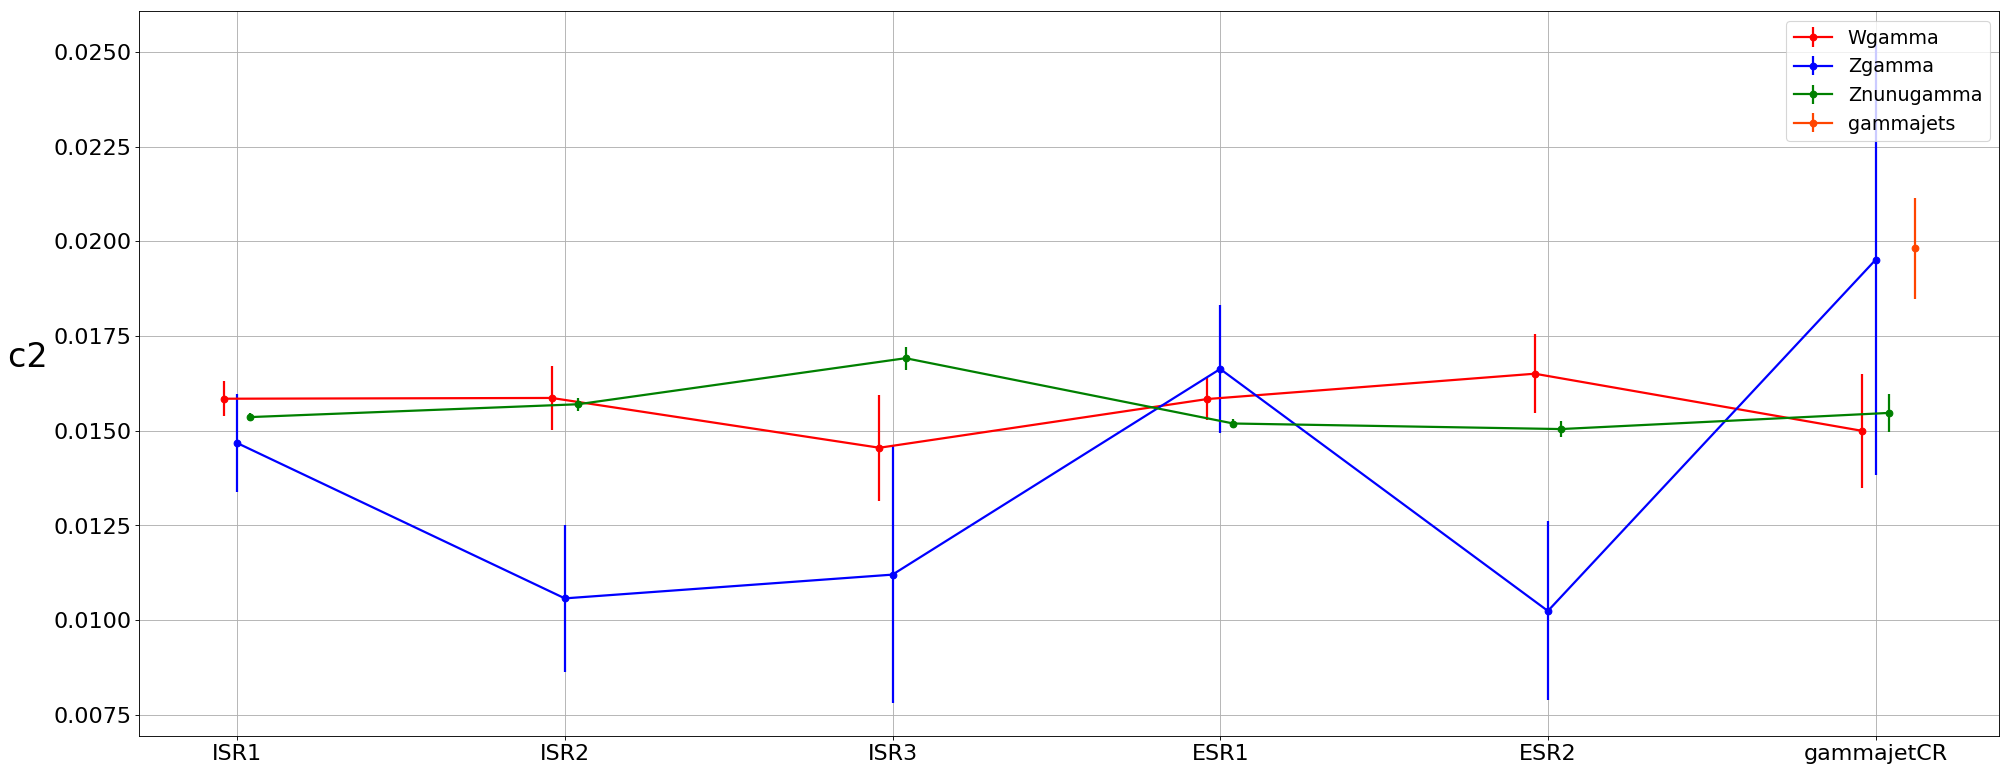

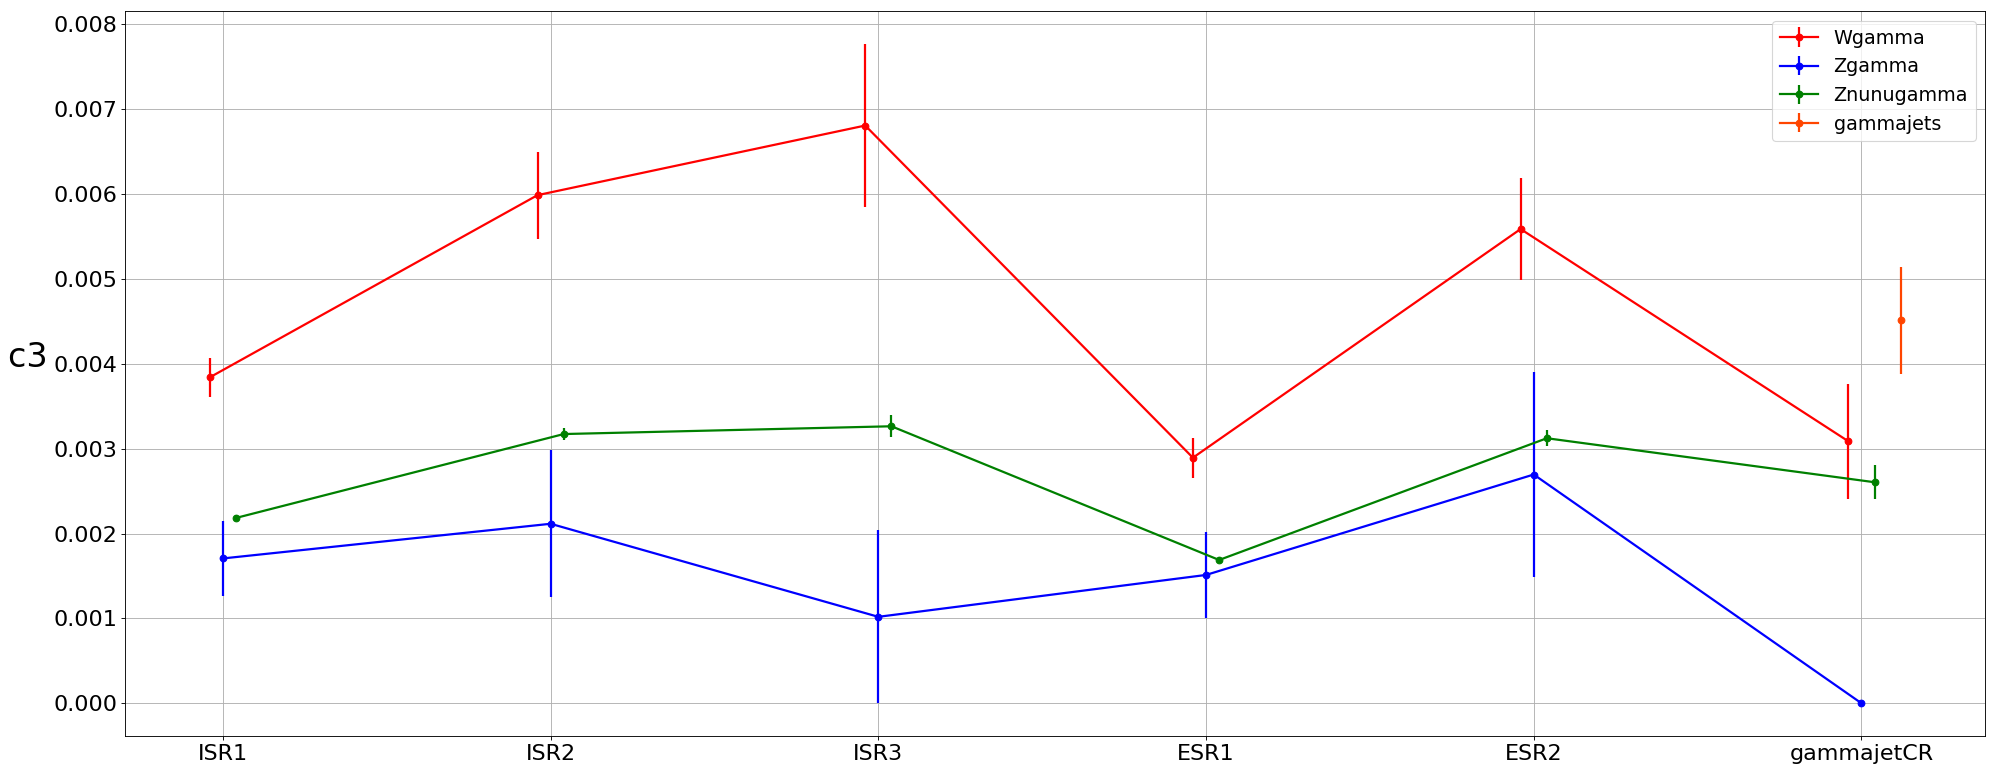

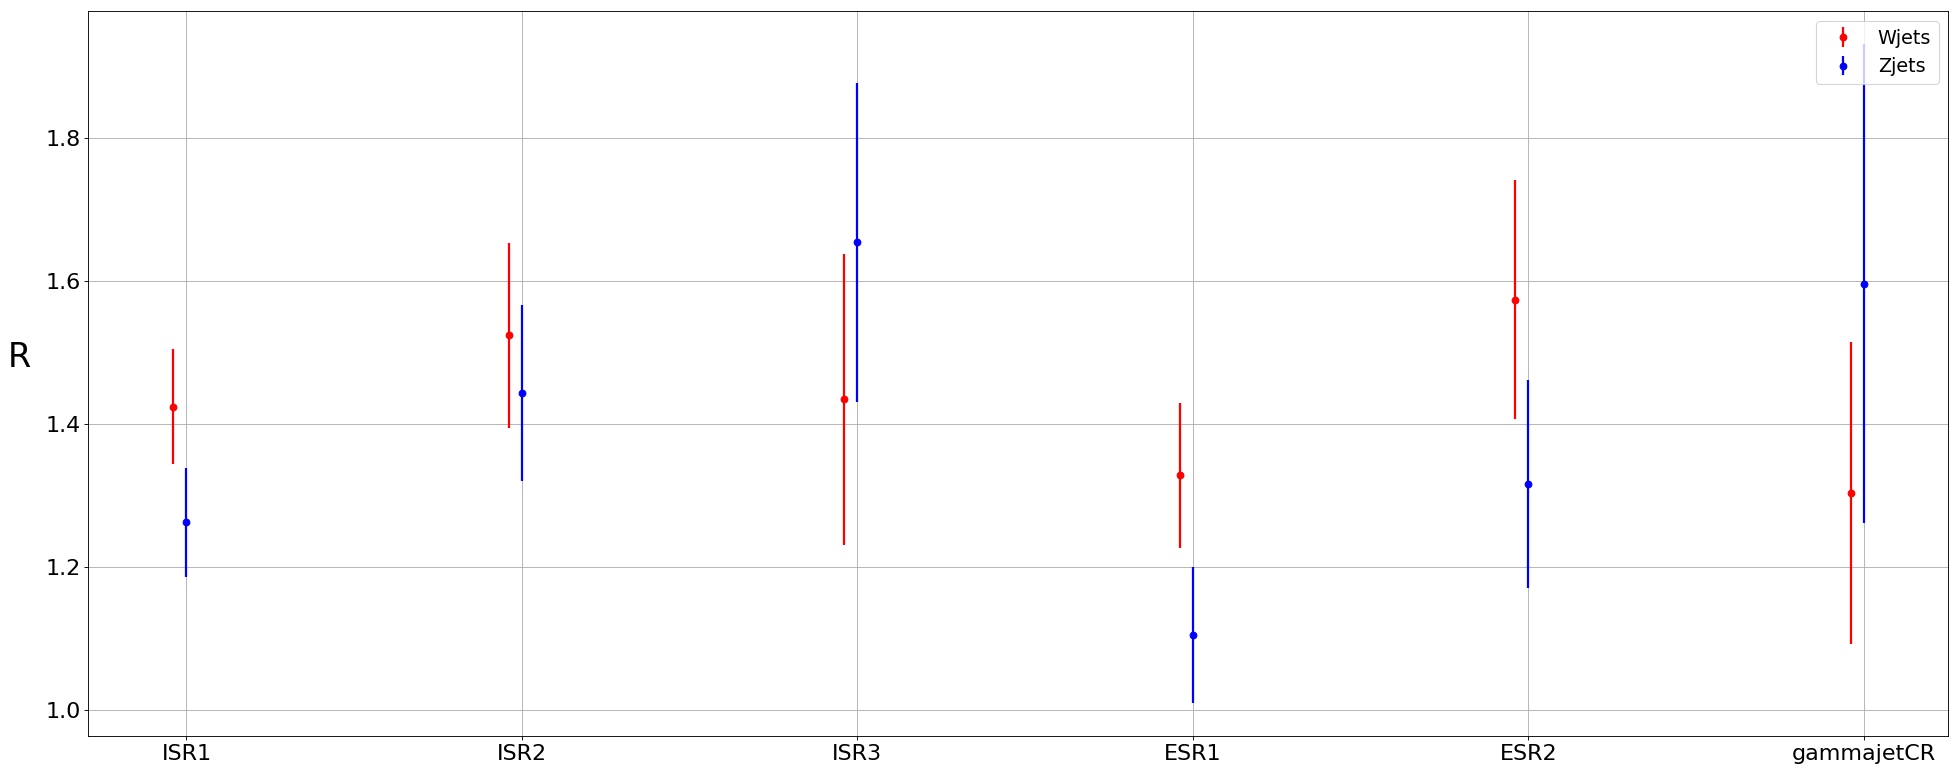

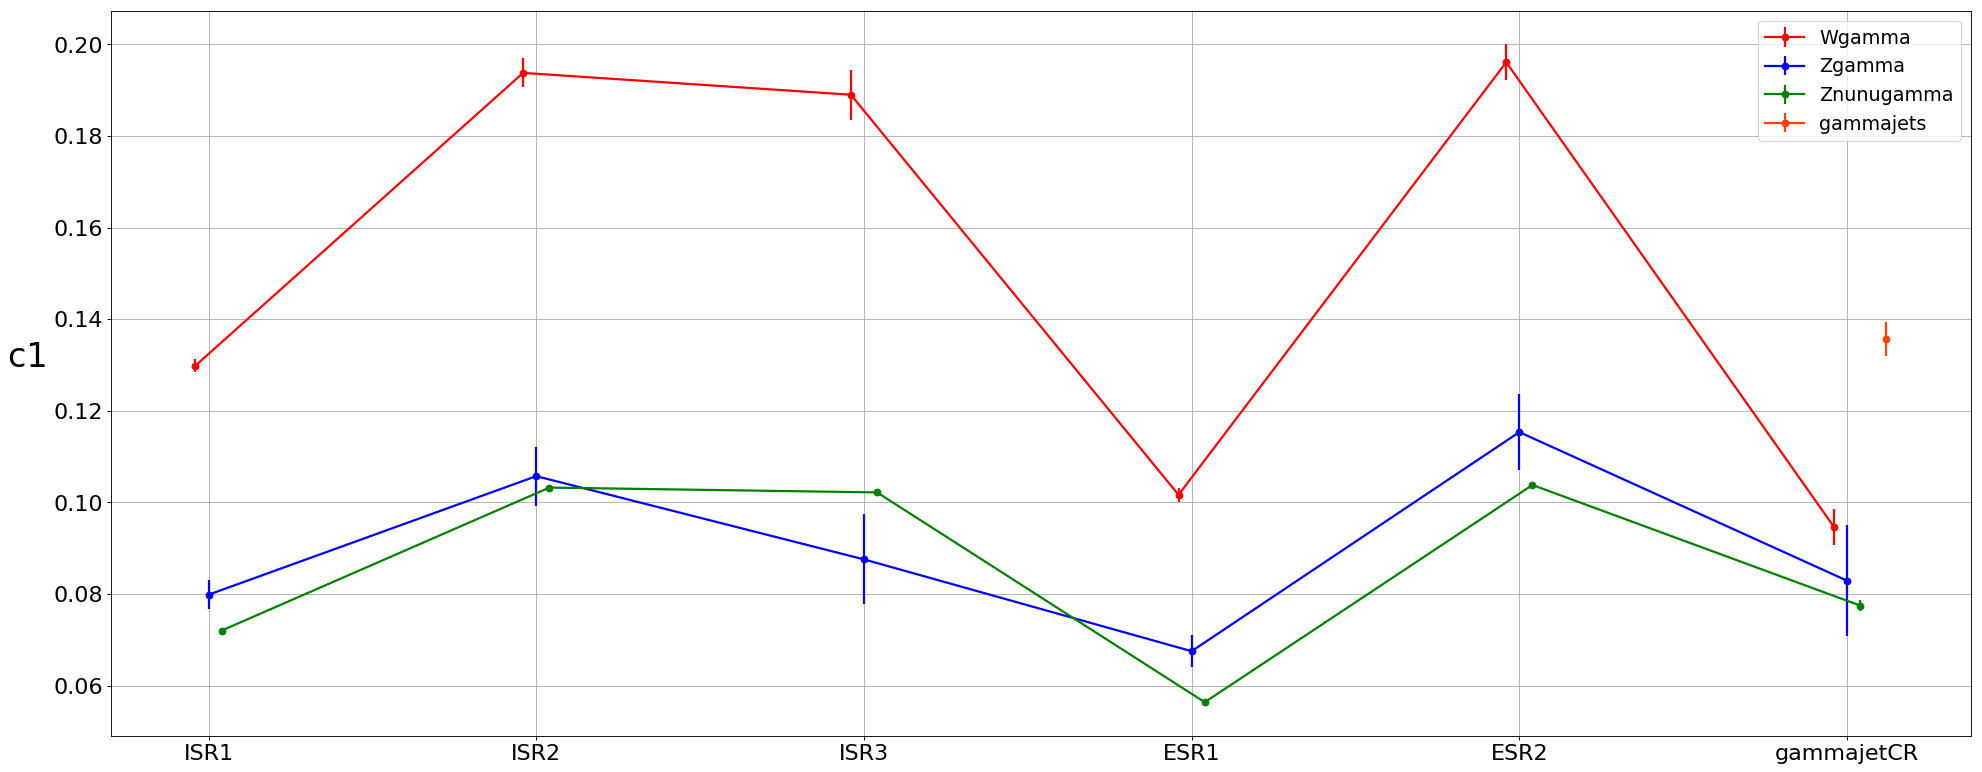

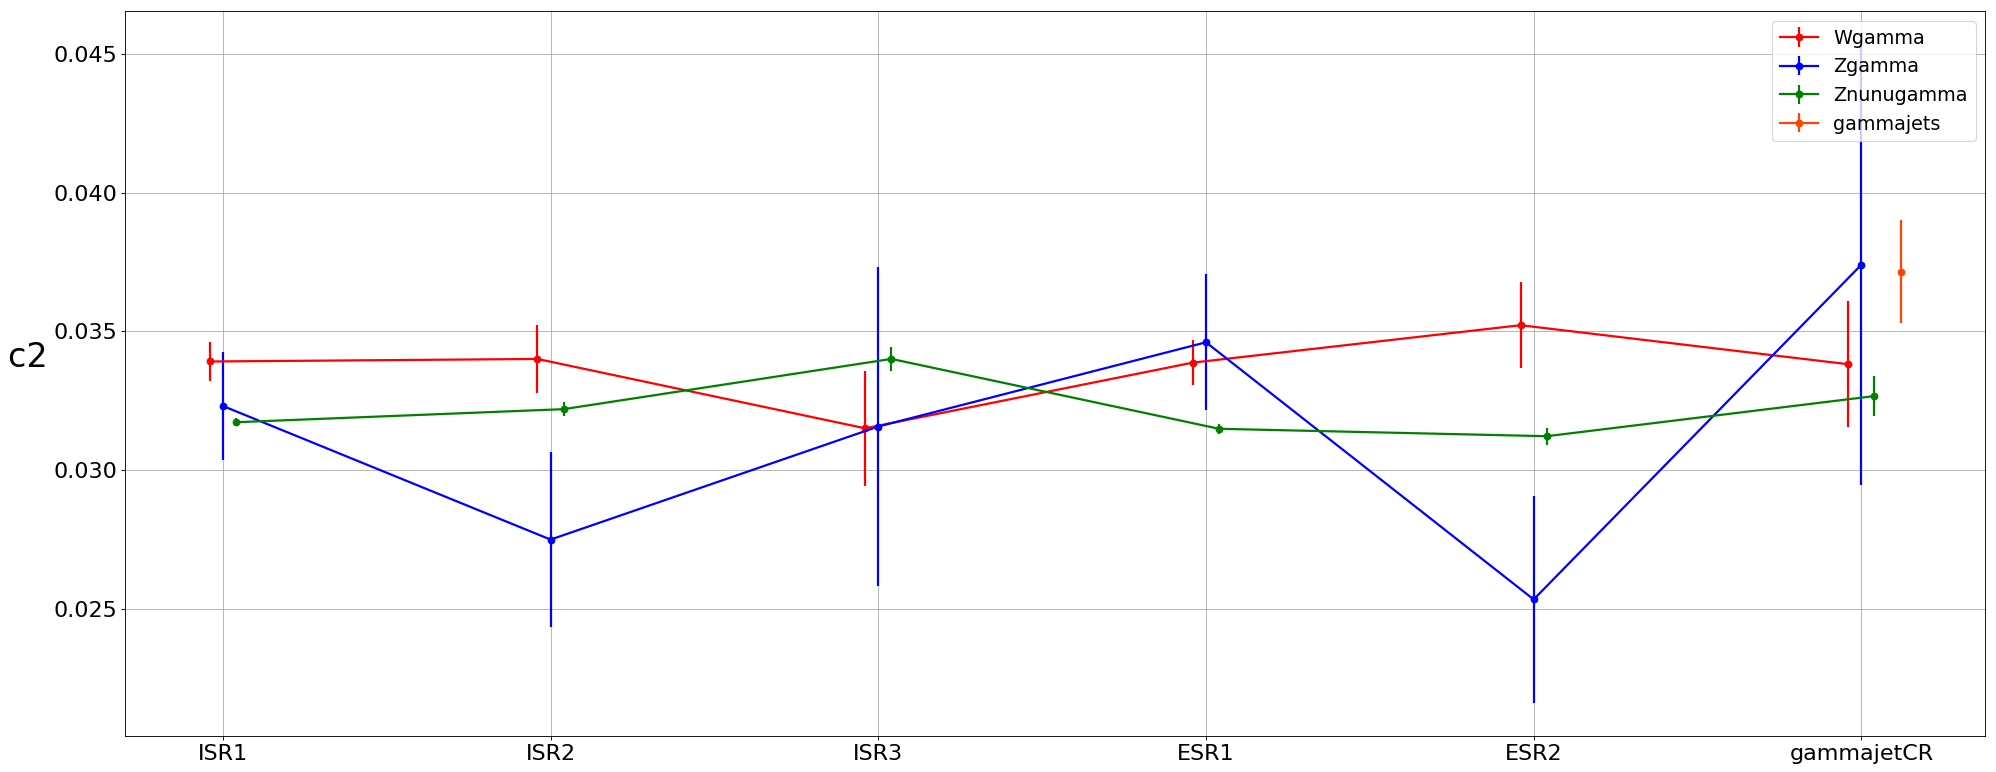

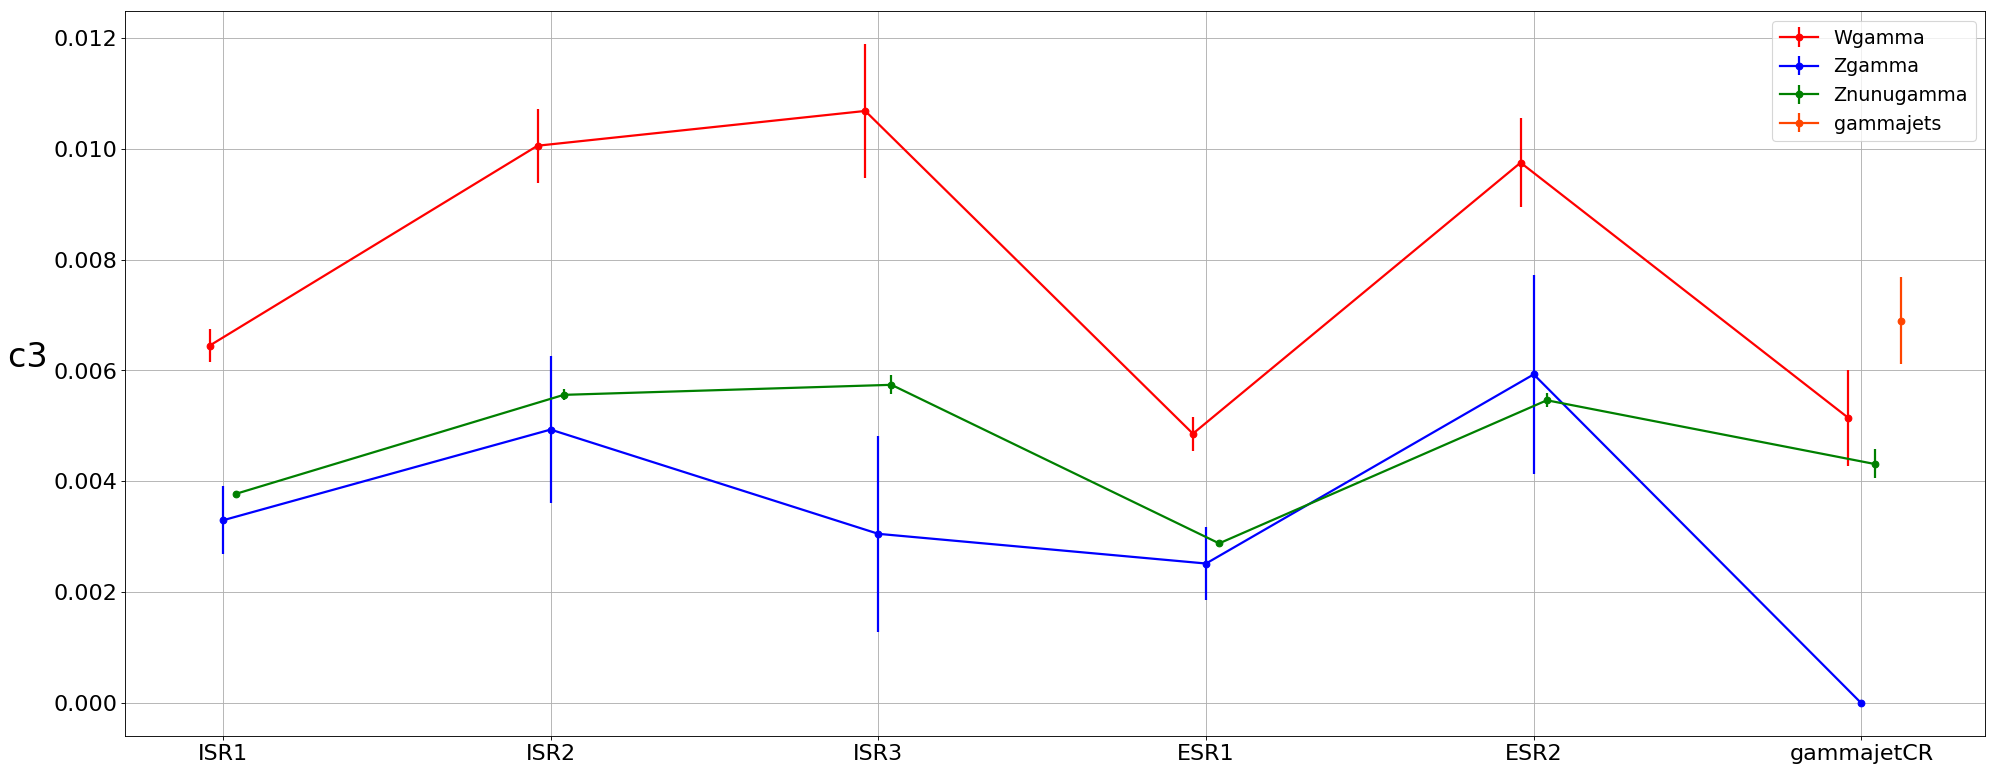

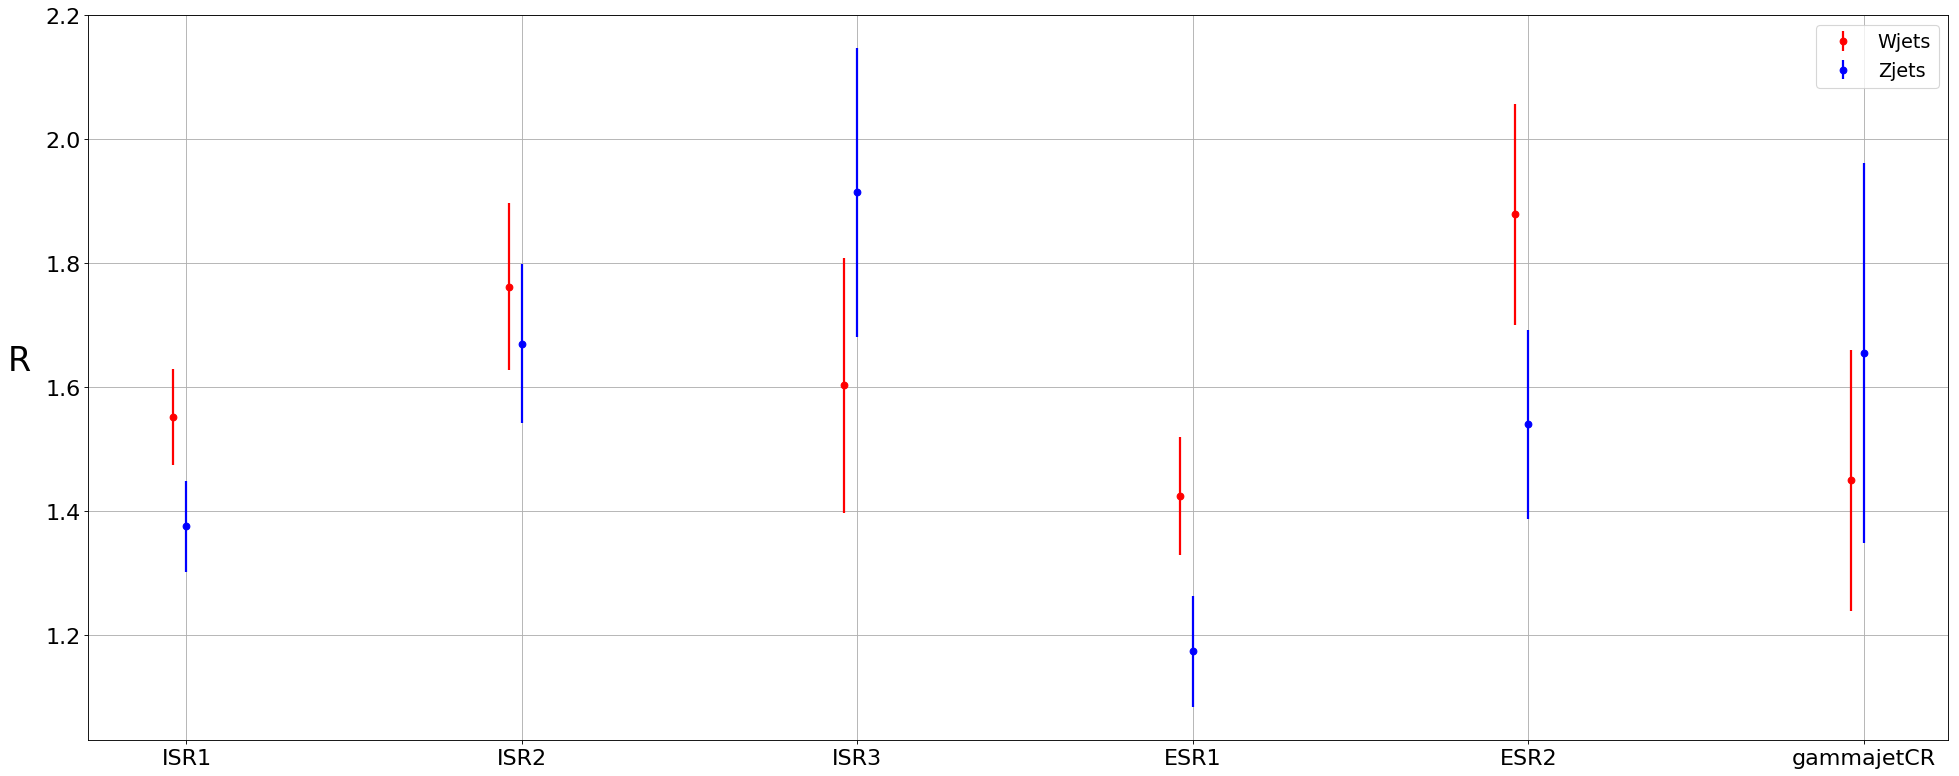

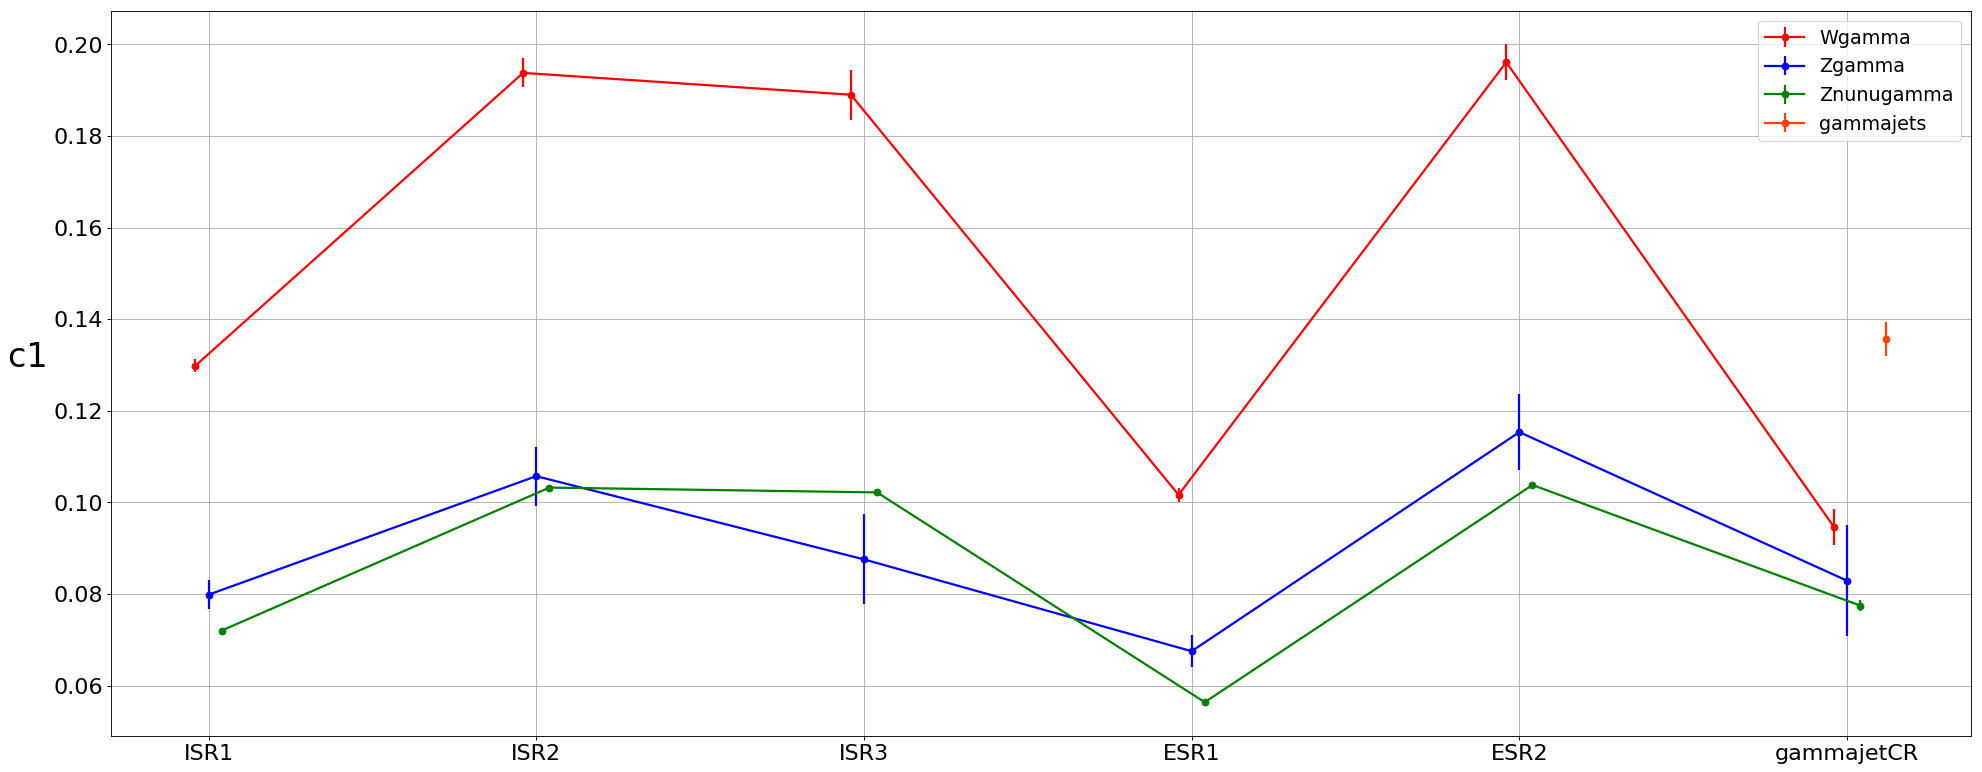

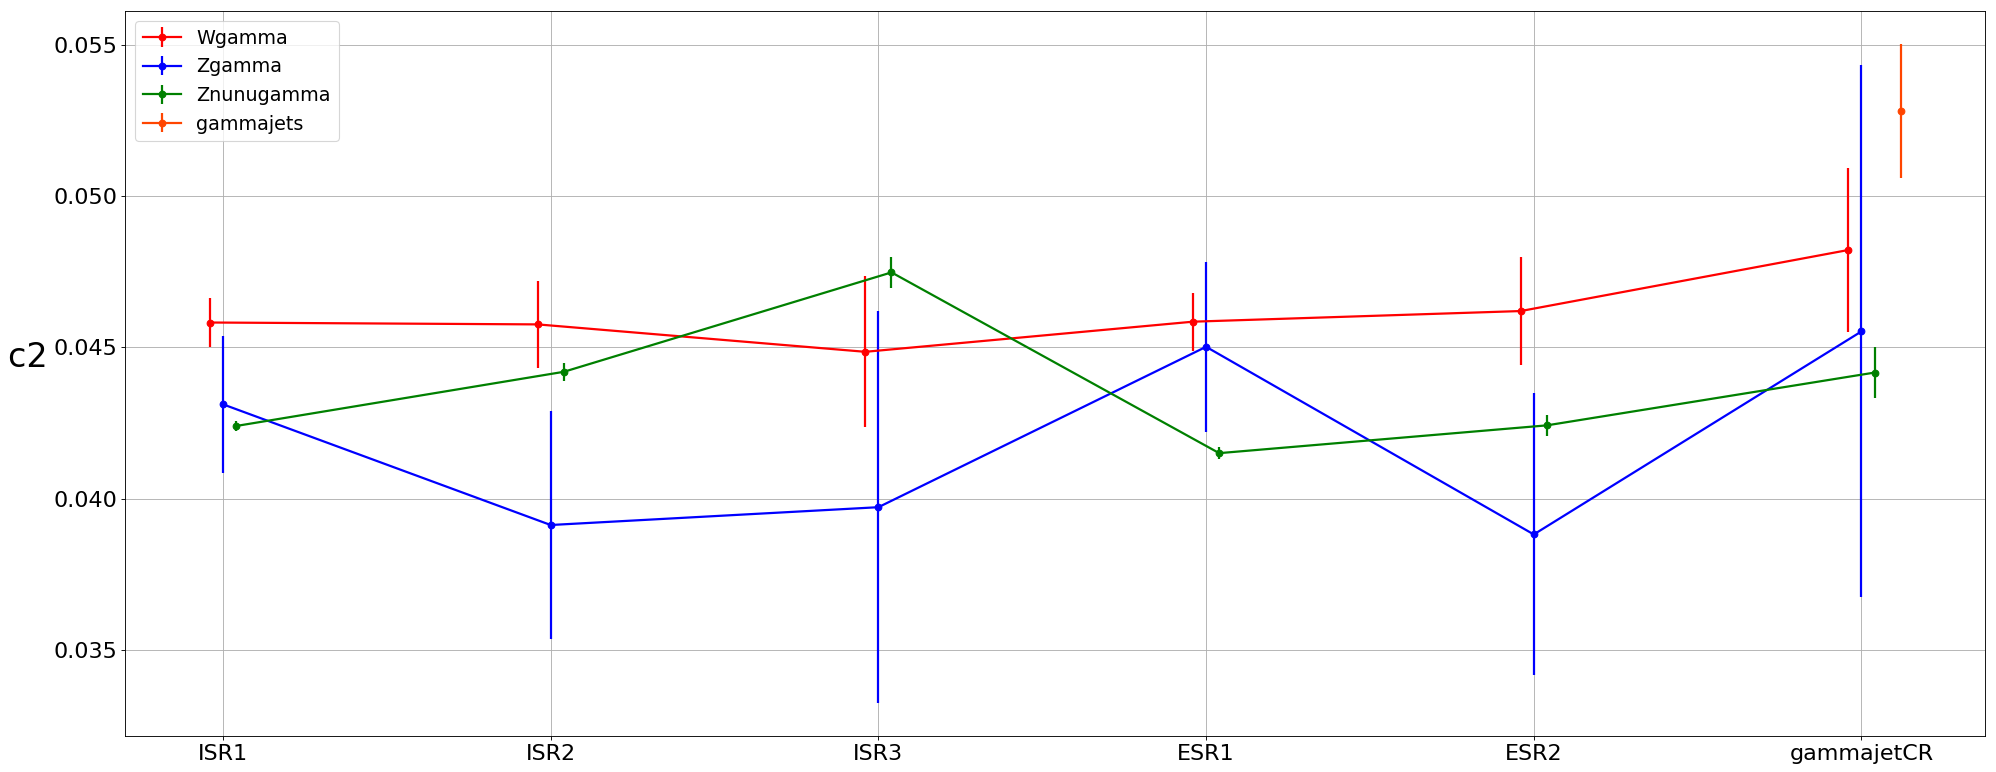

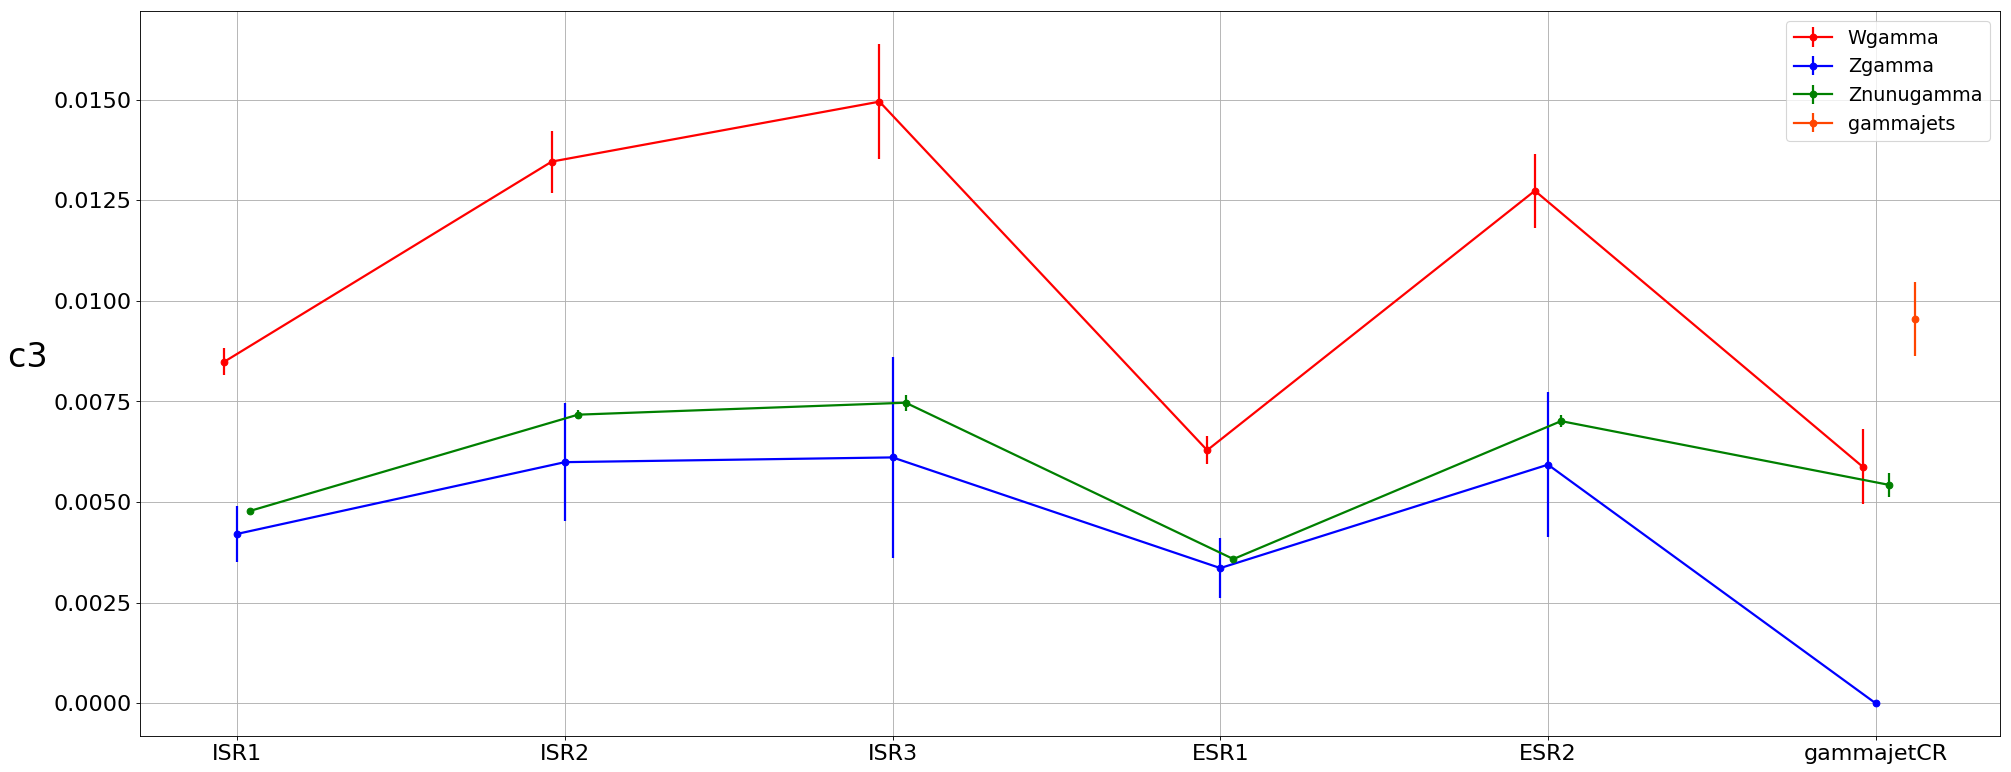

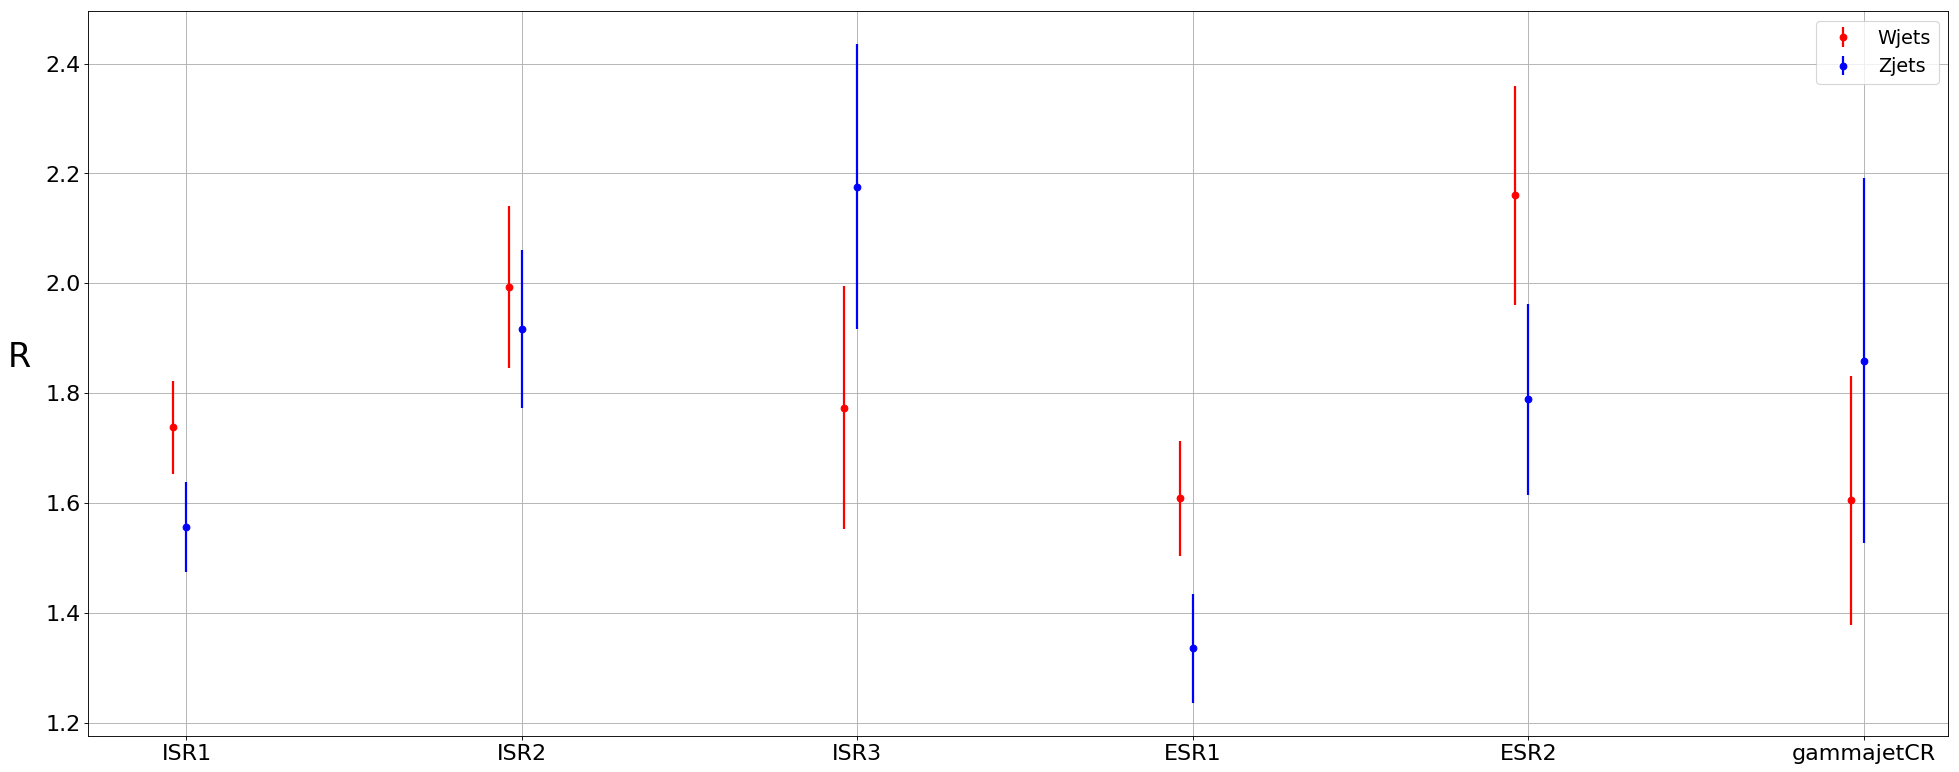

In [46]:
purity_tightness = {}
iso = 'iso'

for not_tight in not_tight_selections:
    
    
    # calcolo dei coefficienti di leakage e correlazione
    c1 = {}
    c2 = {}
    c3 = {}
    R  = {}

    for key in signal:
        
        Na = merge(signal, key, 'tight', iso, 'Na')
        Nb = merge(signal, key, 'tight', iso, 'Nb')
        Ma = merge(signal, key, not_tight, iso, 'Na')
        Mb = merge(signal, key, not_tight, iso, 'Nb')
                
        c1.update({key: leakage_coefficient(Nb,Na)})
        c2.update({key: leakage_coefficient(Ma,Na)})
        c3.update({key: leakage_coefficient(Mb,Na)})


    for key in background:

        Na = merge(background, key, 'tight', iso, 'Na')
        Nb = merge(background, key, 'tight', iso, 'Nb')
        Ma = merge(background, key, not_tight, iso, 'Na')
        Mb = merge(background, key, not_tight, iso, 'Nb')
        
        R.update({key: correlation_factor(Na,Nb,Ma,Mb)})

    
    plot_coefficient(c1, 'c1')
    plot_coefficient(c2, 'c2')
    plot_coefficient(c3, 'c3')
    plot_coefficient(R, 'R')

    # from 5+1 values for each coefficient we want 21 values, one for each region
    c1 = analyze_coefficient(c1)
    c2 = analyze_coefficient(c2)
    c3 = analyze_coefficient(c3)
    R  = analyze_coefficient(R)


    Na = [data[cr][met_region]['tight'][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Na']]
    Nb = [data[cr][met_region]['tight'][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Nb']]
    Ma = [data[cr][met_region][not_tight][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Na']]
    Mb = [data[cr][met_region][not_tight][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Nb']]


        
    purity_tightness.update({not_tight: purity(Na, Nb, Ma, Mb, c1, c2, c3, R)})
    

tightness_systematics = [max(abs(purity_tightness['tight3']['mean'][i] - purity_tightness['tight4']['mean'][i]),\
                             abs(purity_tightness['tight5']['mean'][i] - purity_tightness['tight4']['mean'][i])) for i in range(len(purity_tightness['tight3']['mean']))]

Text(0, 0.5, 'P [%]        ')

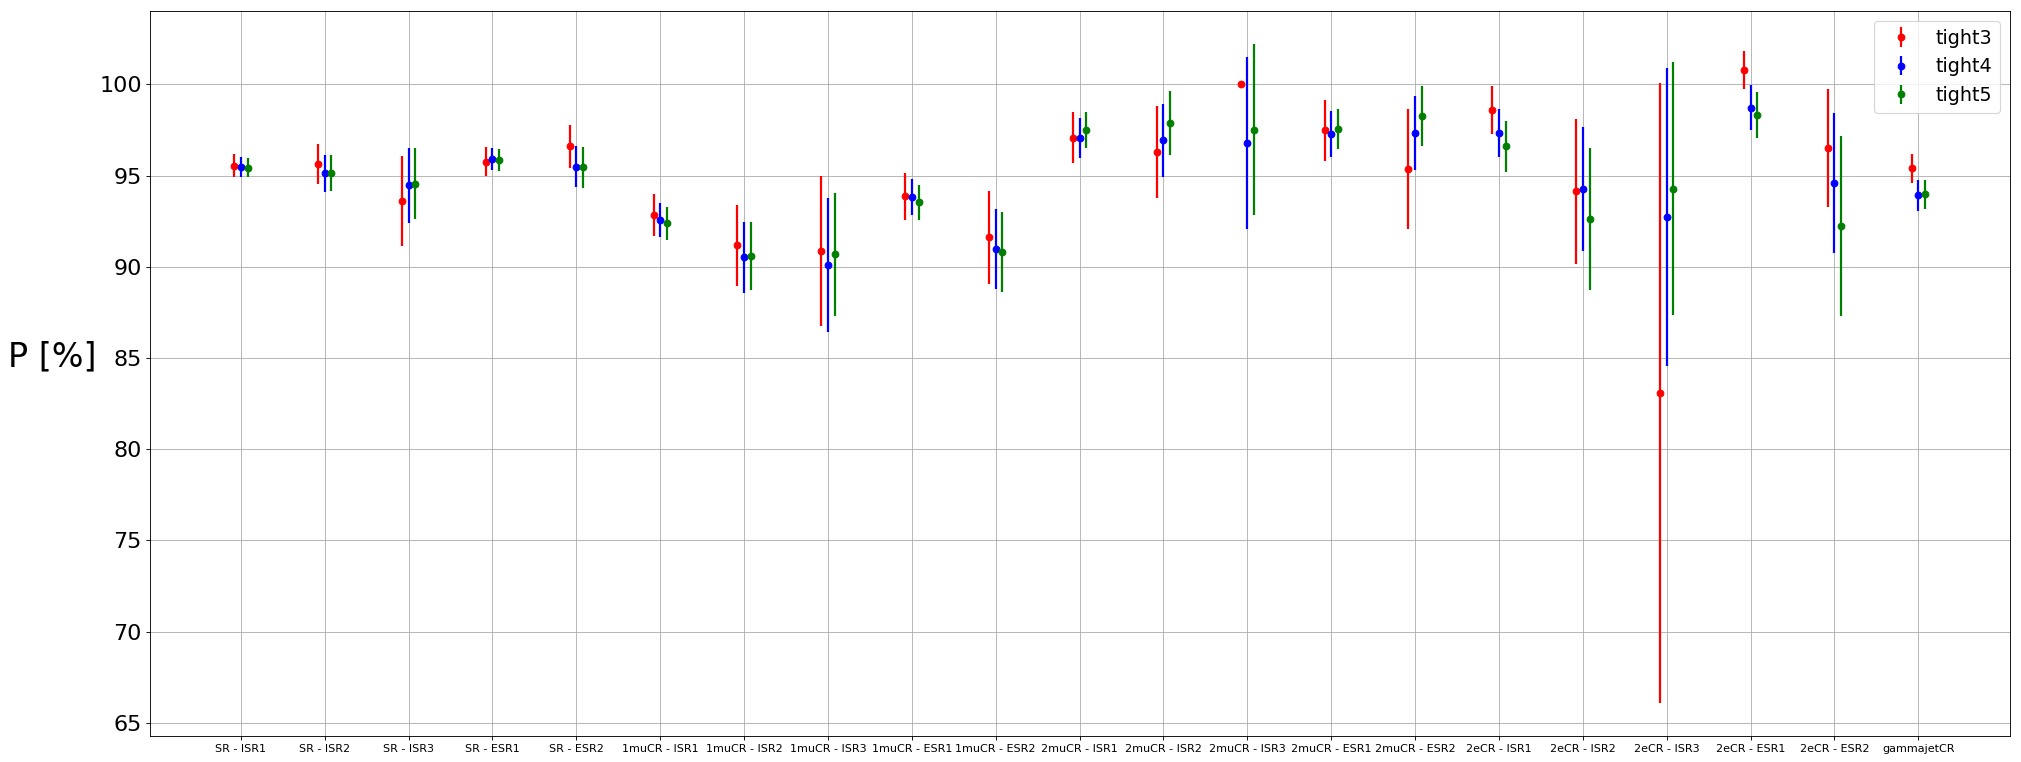

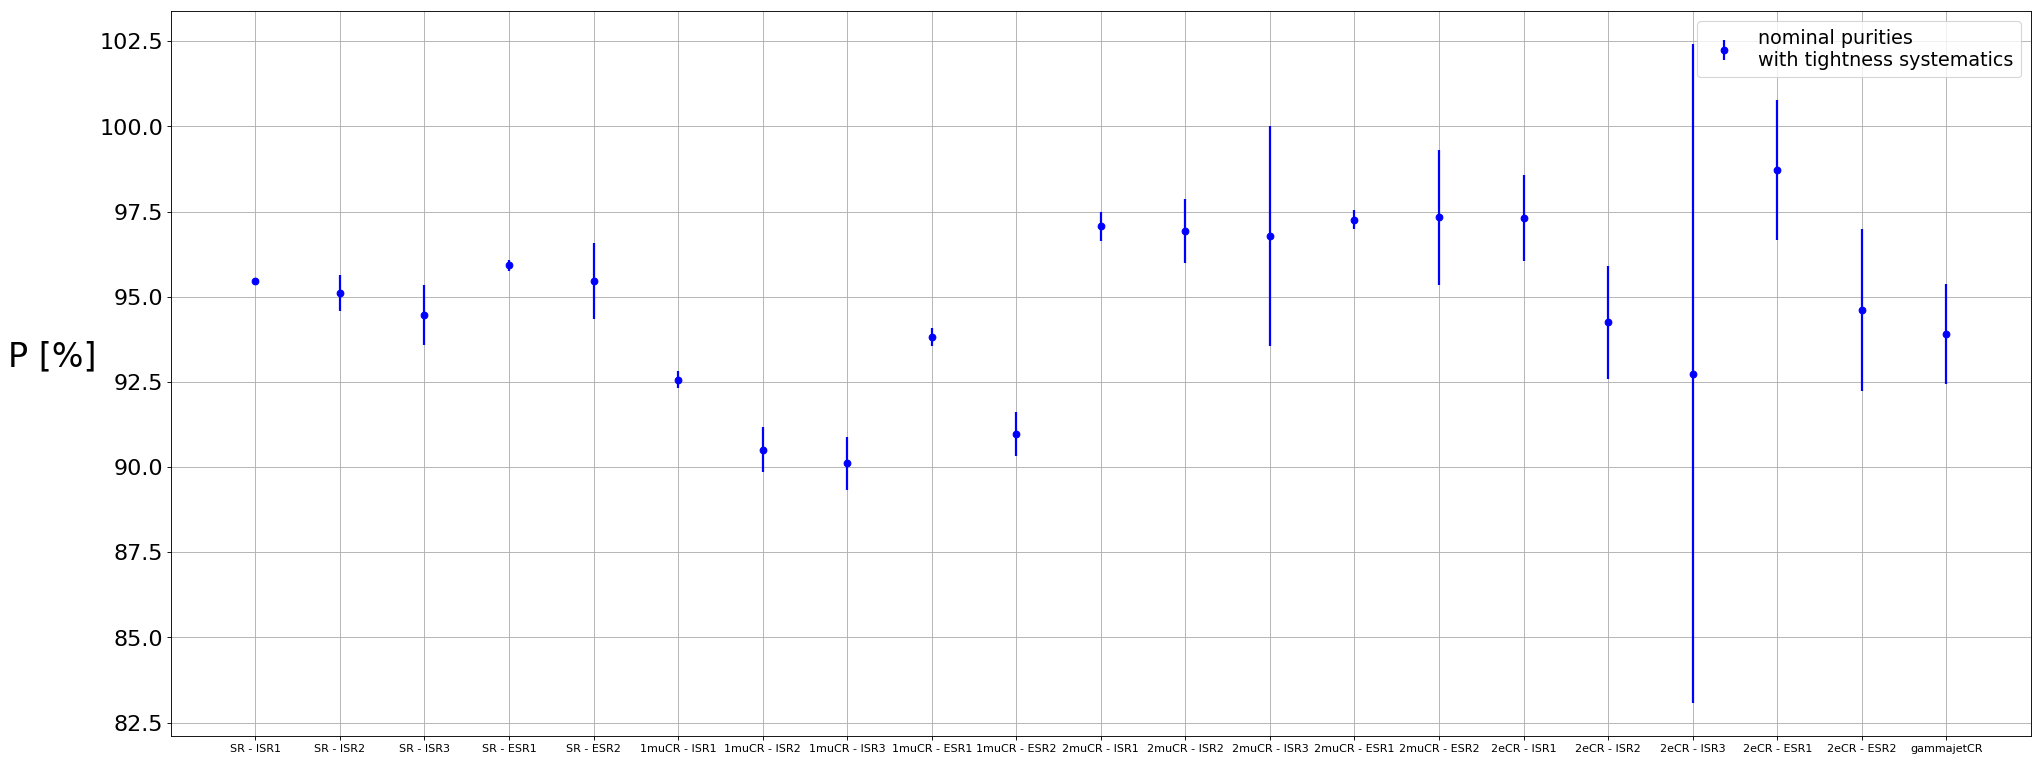

In [47]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_tightness[not_tight_selections[0]]['mean'], yerr=purity_tightness[not_tight_selections[0]]['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label=not_tight_selections[0])
plt.errorbar([i+0.00 for i in range(21)], purity_tightness[not_tight_selections[1]]['mean'], yerr=purity_tightness[not_tight_selections[1]]['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label=not_tight_selections[1])
plt.errorbar([i+0.08 for i in range(21)], purity_tightness[not_tight_selections[2]]['mean'], yerr=purity_tightness[not_tight_selections[2]]['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label=not_tight_selections[2])

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)


plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i for i in range(21)], purity_tightness['tight4']['mean'], yerr=tightness_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith tightness systematics')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

In [48]:
purity_isolation = {}
not_tight = 'tight4'

for iso in isolation_variations:
    
    # calcolo dei coefficienti di leakage e correlazione
    c1 = {}
    c2 = {}
    c3 = {}
    R  = {}

    for key in signal:
        
        Na = merge(signal, key, 'tight', iso, 'Na')
        Nb = merge(signal, key, 'tight', iso, 'Nb')
        Ma = merge(signal, key, not_tight, iso, 'Na')
        Mb = merge(signal, key, not_tight, iso, 'Nb')
                
        c1.update({key: leakage_coefficient(Nb,Na)})
        c2.update({key: leakage_coefficient(Ma,Na)})
        c3.update({key: leakage_coefficient(Mb,Na)})


    for key in background:

        Na = merge(background, key, 'tight', iso, 'Na')
        Nb = merge(background, key, 'tight', iso, 'Nb')
        Ma = merge(background, key, not_tight, iso, 'Na')
        Mb = merge(background, key, not_tight, iso, 'Nb')
        
        R.update({key: correlation_factor(Na,Nb,Ma,Mb)})

    
    #plot_coefficient(c1, 'c1')
    #plot_coefficient(c2, 'c2')
    #plot_coefficient(c3, 'c3')
    #plot_coefficient(R, 'R')
    

    # from 5+1 values for each coefficient we want 21 values, one for each region
    c1 = analyze_coefficient(c1)
    c2 = analyze_coefficient(c2)
    c3 = analyze_coefficient(c3)
    R  = analyze_coefficient(R)


    Na = [data[cr][met_region]['tight'][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Na']]
    Nb = [data[cr][met_region]['tight'][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR']['tight'][iso]['Nb']]
    Ma = [data[cr][met_region][not_tight][iso]['Na'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Na']]
    Mb = [data[cr][met_region][not_tight][iso]['Nb'] for cr in CR for met_region in met_regions] + [data['gammajetCR'][not_tight][iso]['Nb']]


        
    purity_isolation.update({iso: purity(Na, Nb, Ma, Mb, c1, c2, c3, R)})
    
    
isolation_systematics = [max(abs(purity_isolation['up']['mean'][i] - purity_isolation['iso']['mean'][i]),\
                             abs(purity_isolation['down']['mean'][i] - purity_isolation['iso']['mean'][i])) for i in range(len(purity_isolation['up']['mean']))]

Text(0, 0.5, 'P [%]        ')

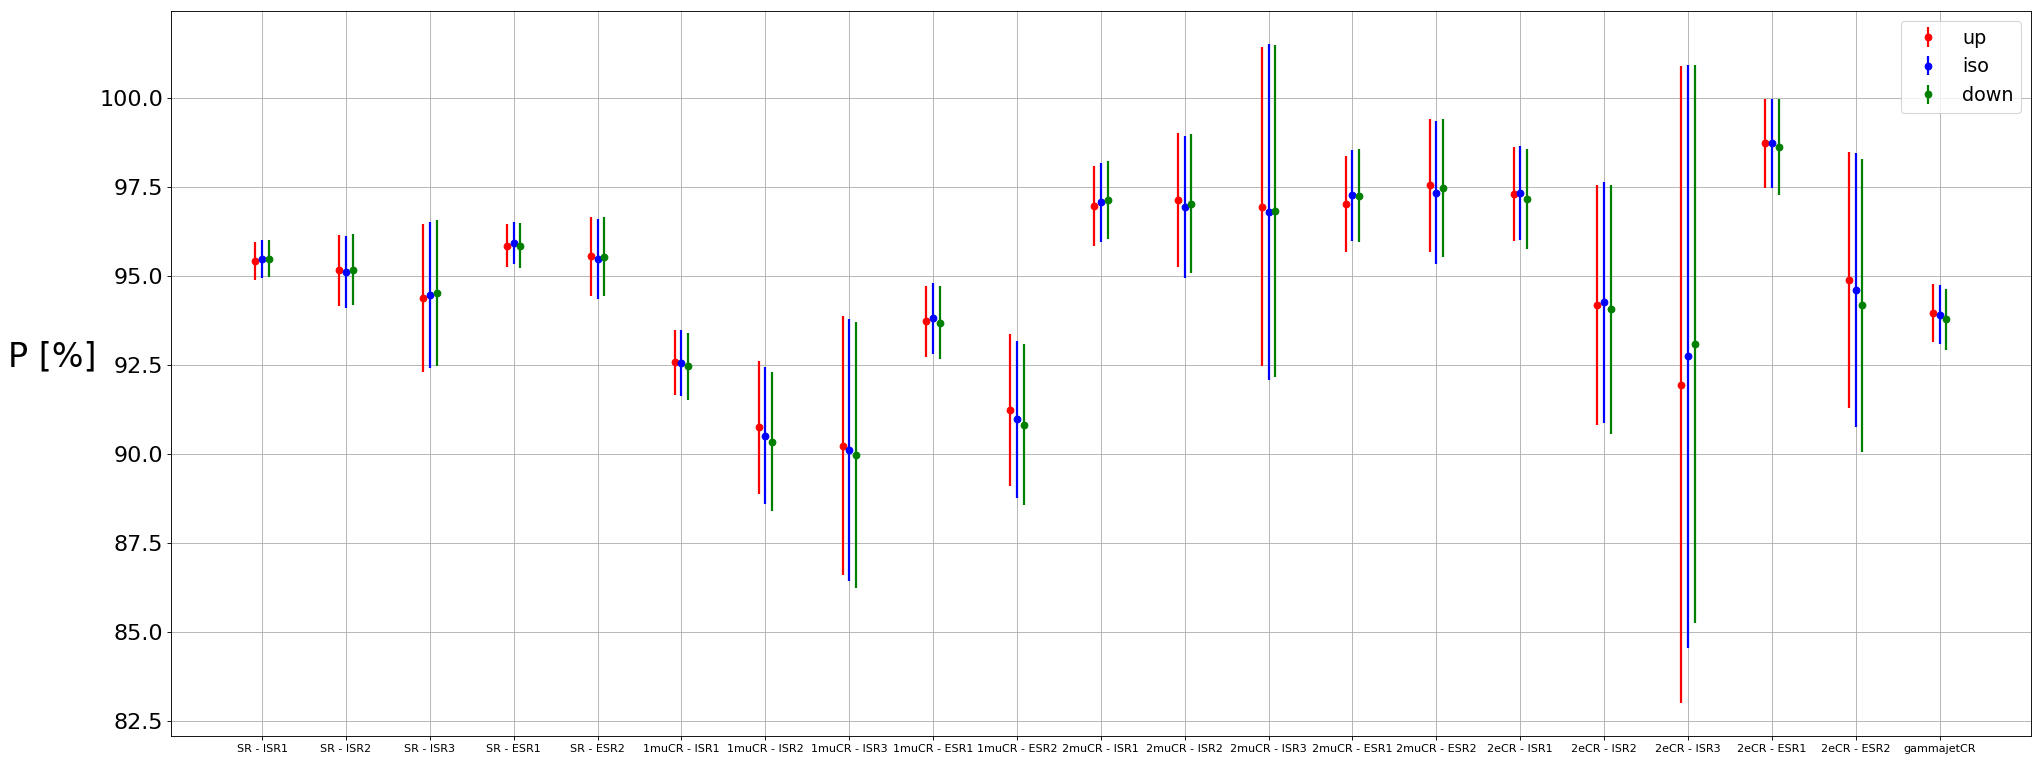

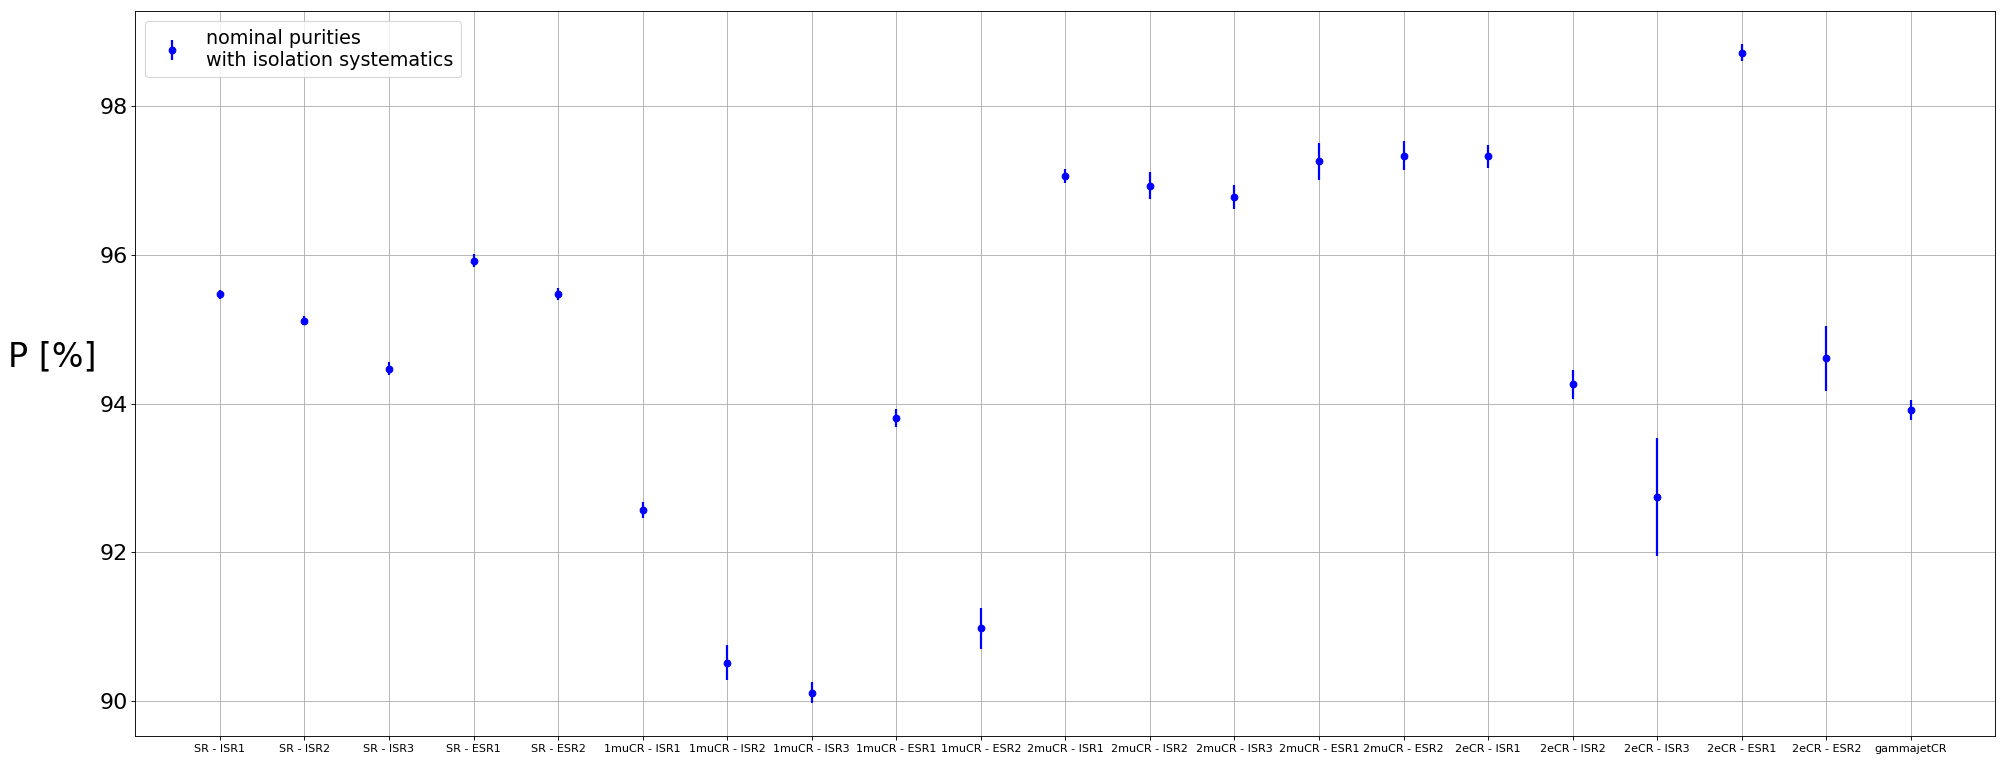

In [49]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.08 for i in range(21)], purity_isolation[isolation_variations[0]]['mean'], yerr=purity_isolation[isolation_variations[0]]['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label=isolation_variations[0])
plt.errorbar([i+0.00 for i in range(21)], purity_isolation[isolation_variations[1]]['mean'], yerr=purity_isolation[isolation_variations[1]]['sigma'], fmt='b', marker='o', linestyle='', linewidth=2, label=isolation_variations[1])
plt.errorbar([i+0.08 for i in range(21)], purity_isolation[isolation_variations[2]]['mean'], yerr=purity_isolation[isolation_variations[2]]['sigma'], fmt='g', marker='o', linestyle='', linewidth=2, label=isolation_variations[2])

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)




plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=isolation_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith isolation systematics')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

Text(0, 0.5, 'P [%]        ')

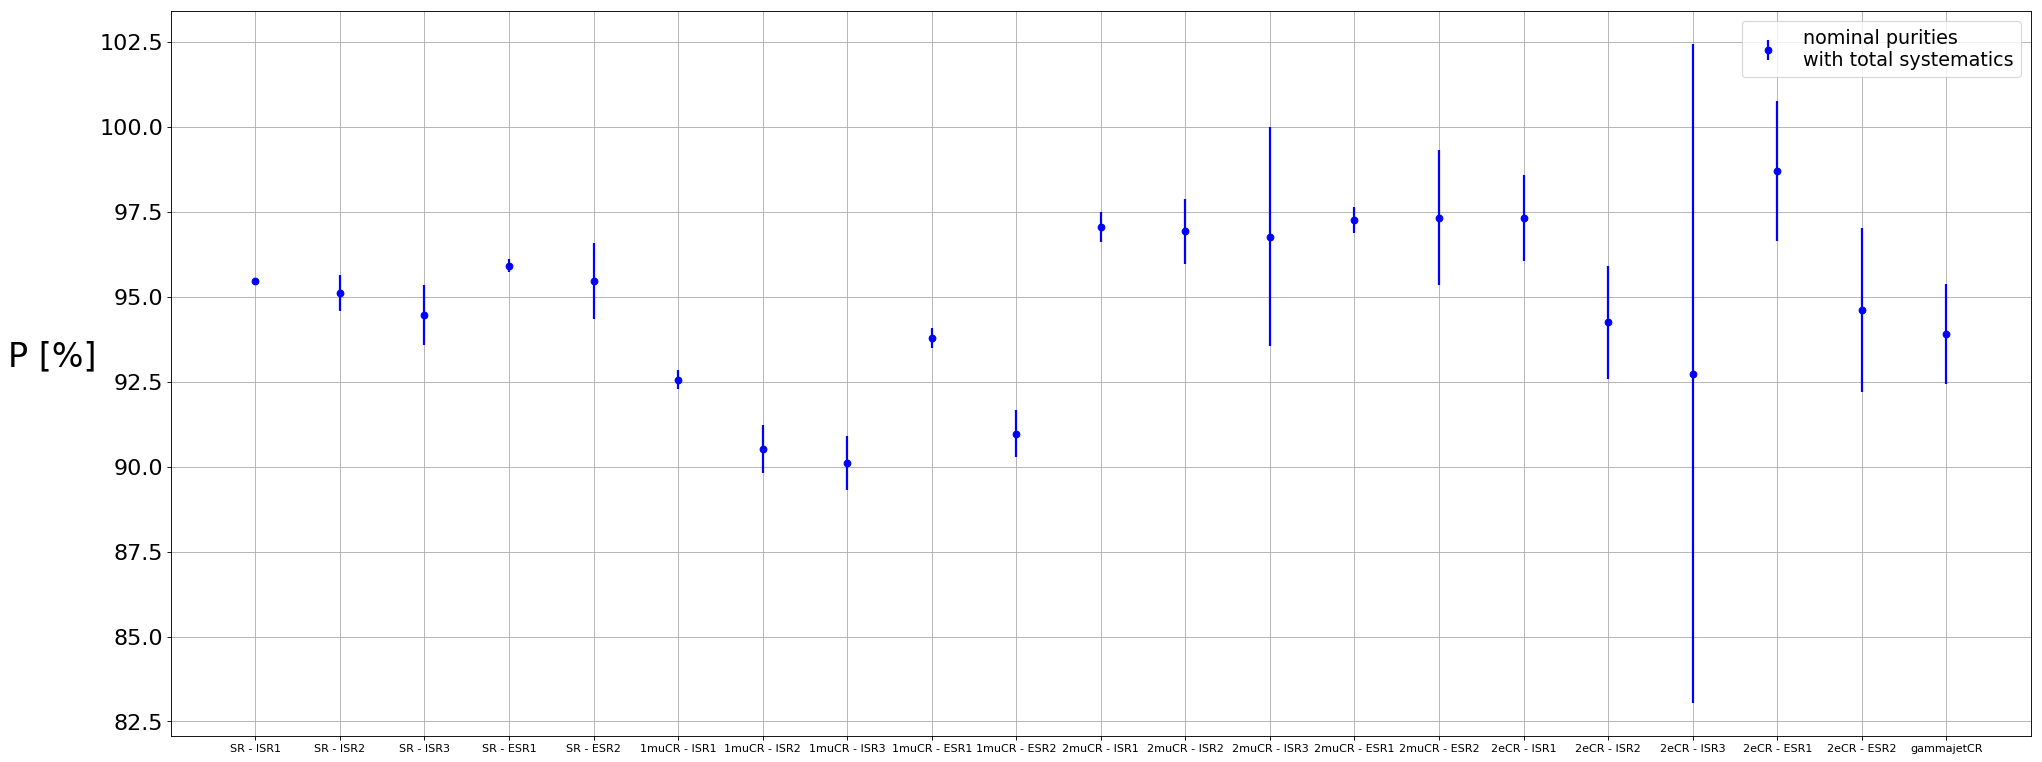

In [50]:
total_systematics = [math.sqrt(pow(tightness_systematics[i],2) + pow(isolation_systematics[i],2)) for i in range(len(tightness_systematics))]

plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=total_systematics, fmt='b', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith total systematics')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

Text(0, 0.5, 'P [%]        ')

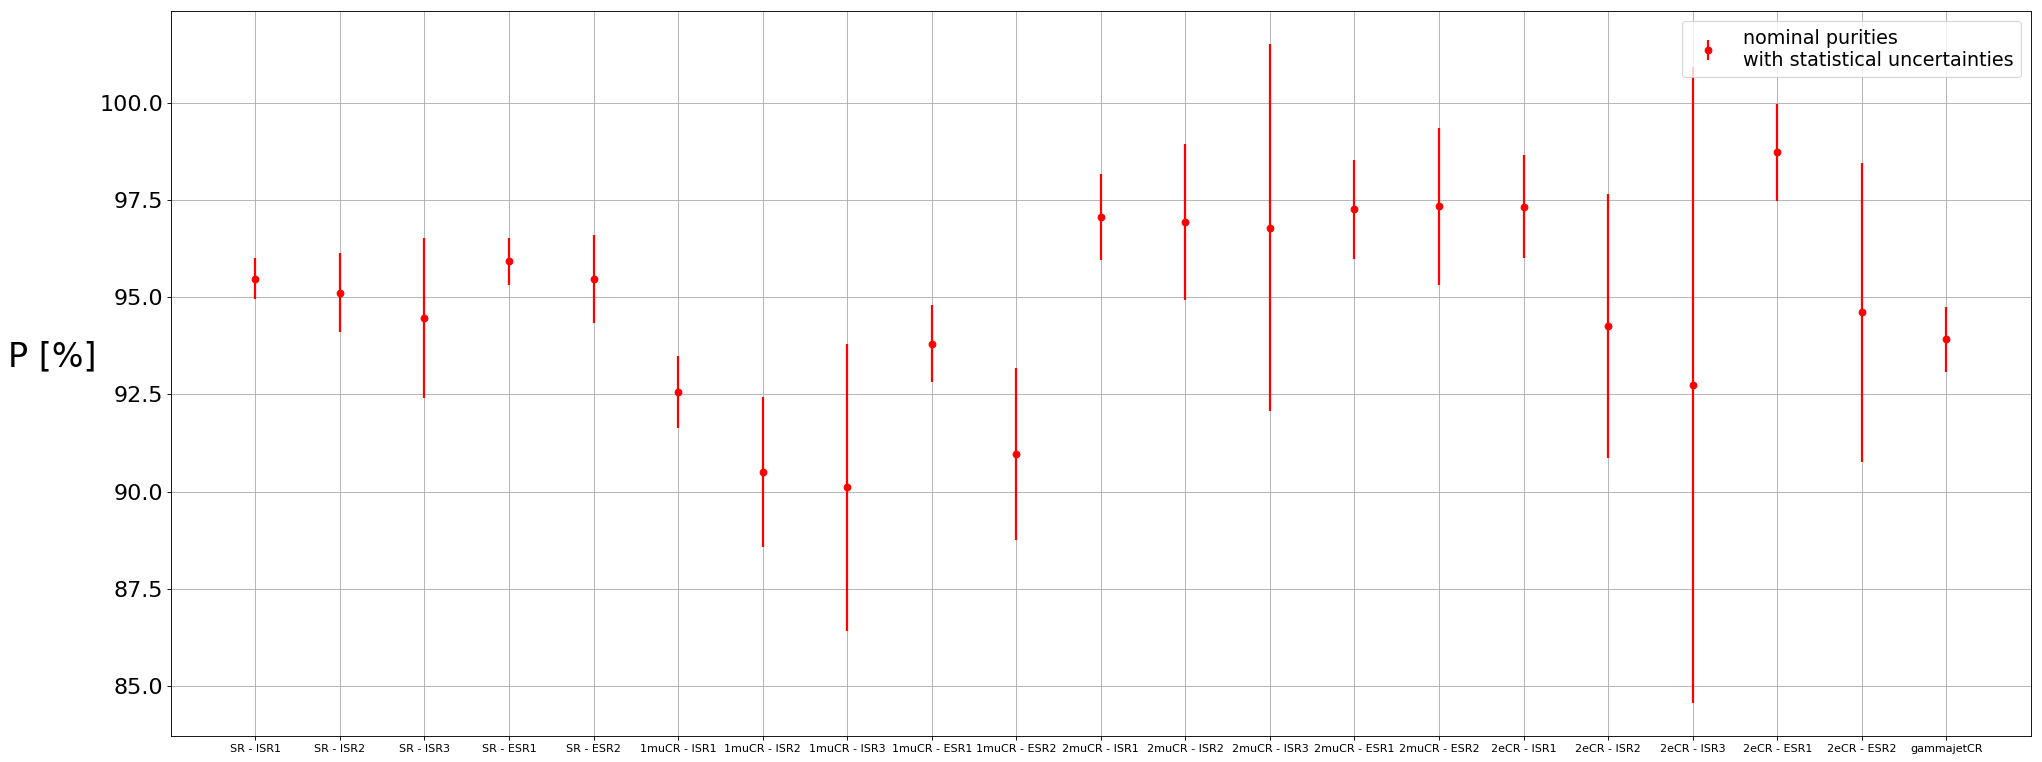

In [51]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=purity_isolation['iso']['sigma'], fmt='r', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith statistical uncertainties')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

Text(0, 0.5, 'P [%]        ')

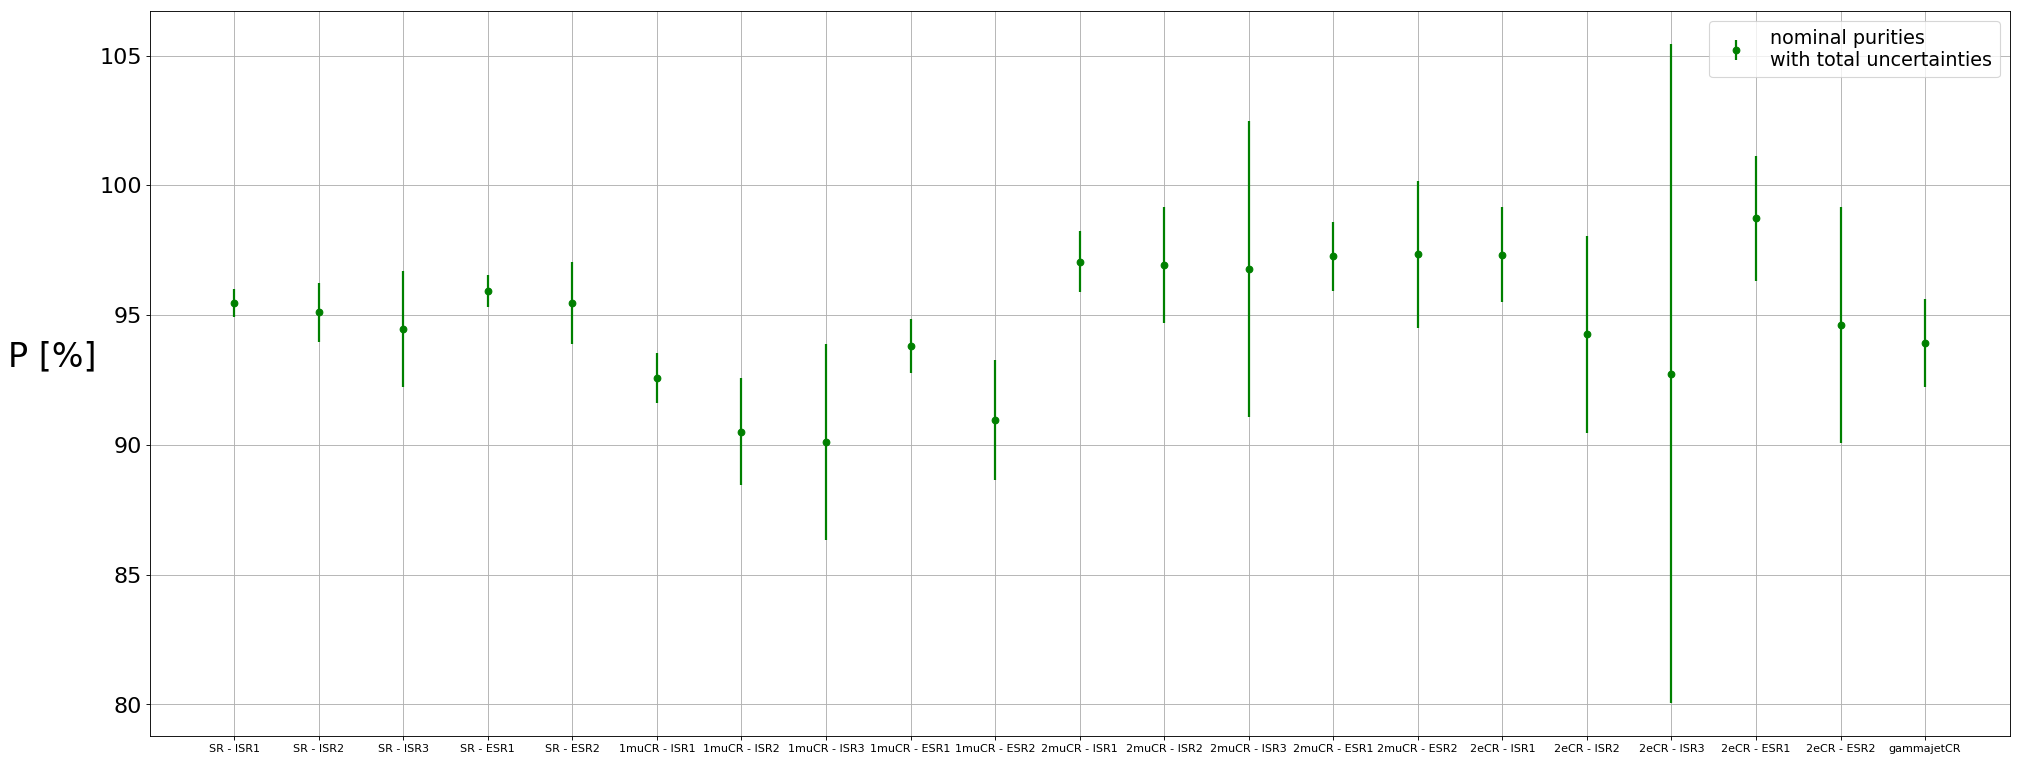

In [52]:
total_error = [math.sqrt(pow(total_systematics[i],2) + pow(purity_isolation['iso']['sigma'][i],2)) for i in range(len(tightness_systematics))]

plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i+0.00 for i in range(21)], purity_isolation['iso']['mean'], yerr=total_error, fmt='g', marker='o', linestyle='', linewidth=2, label='nominal purities\nwith total uncertainties')

plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

In [53]:
print(total_error)

[0.5359493661434583, 1.1353192496396283, 2.235159451935128, 0.6281468361102788, 1.5912622623548354, 0.9661886059020024, 2.0519365894557517, 3.7643153778692855, 1.03684989398024, 2.315178301362828, 1.1851149618242103, 2.2236579844685807, 5.7122830330959875, 1.3245086865565923, 2.8352365296727746, 1.8363060959320234, 3.77997460262433, 12.69144352274405, 2.4068761476931906, 4.538209528608772, 1.6962999275806114]


In [54]:
print([round(100*total_error[i]/purity_isolation['iso']['mean'][i], 4) for i in range(21)])

[0.5614, 1.1936, 2.366, 0.6548, 1.6668, 1.0438, 2.2671, 4.1775, 1.1053, 2.5449, 1.221, 2.294, 5.9022, 1.3618, 2.9128, 1.8868, 4.0103, 13.6853, 2.438, 4.7968, 1.8063]


In [55]:
x_axis = [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR']

for i in range(21):
    if purity_isolation['iso']['mean'][i] > 100:
        print(x_axis[i])

# Test

In [29]:
test = {}

In [30]:
test.update({'Wgamma': (purity_isolation['iso']['mean'], total_error)})

In [42]:
test.update({'Zgamma': (purity_isolation['iso']['mean'], total_error)})

In [56]:
test.update({'Znunugamma': (purity_isolation['iso']['mean'], total_error)})

Text(0, 0.5, 'P [%]        ')

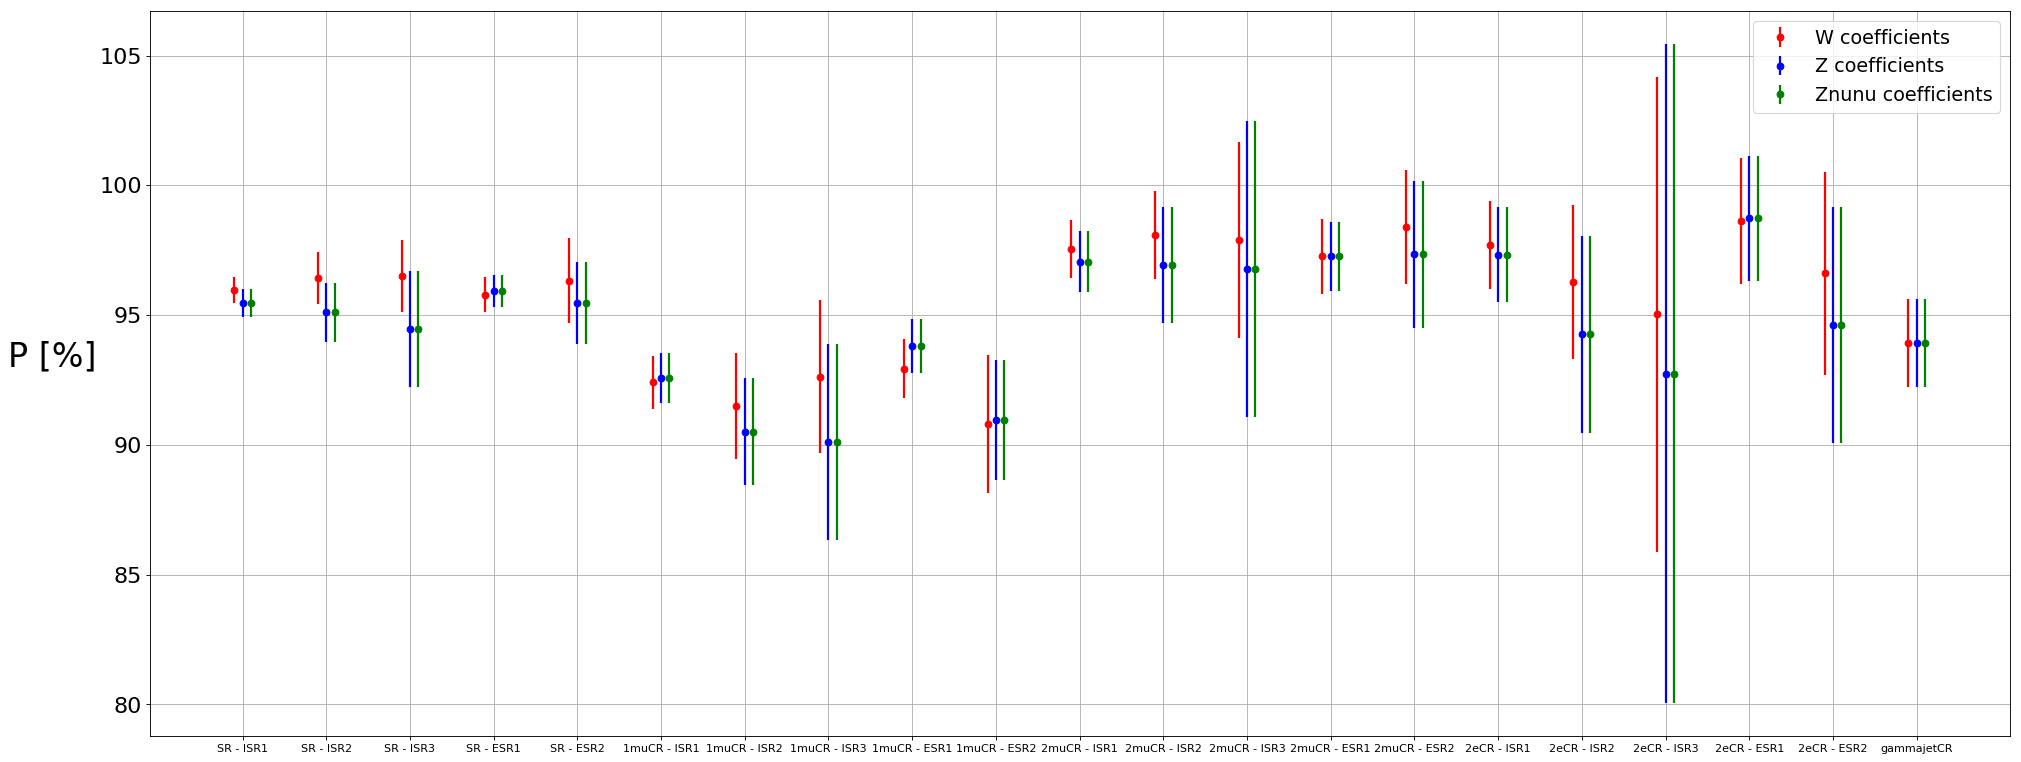

In [58]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar([i-0.10 for i in range(21)], test['Wgamma'][0], yerr=test['Wgamma'][1], fmt='r', marker='o', linestyle='', linewidth=2, label='W coefficients')
plt.errorbar([i+0.00 for i in range(21)], test['Zgamma'][0], yerr=test['Zgamma'][1], fmt='b', marker='o', linestyle='', linewidth=2, label='Z coefficients')
plt.errorbar([i+0.10 for i in range(21)], test['Znunugamma'][0], yerr=test['Znunugamma'][1], fmt='g', marker='o', linestyle='', linewidth=2, label='Znunu coefficients')





plt.xticks(range(21), [cr + ' - ' + met_region for cr in CR_label for met_region in met_regions] + ['gammajetCR'])
plt.yticks(fontsize=20)
plt.legend(fontsize="xx-large")
plt.grid()
plt.ylabel('P [%]        ', rotation=0, fontsize=30)

In [ ]:
print()